In [1]:
import numpy as np
# Makes it easy to organize and work with data like in a spreadsheet.
import pandas as pd  
# Helps to draw cool charts and graphs.
import matplotlib.pyplot as plt  
# Makes the charts appear right in the notebook.
%matplotlib inline  
# Makes the charts even more beautiful and colorful.
import seaborn as sns  
# Divides data into training and testing parts.
from sklearn.model_selection import train_test_split   
from scipy.stats import skew
# Helps to hide scary warning messages when running code.
import warnings 
warnings.simplefilter(action='ignore')
from statistics import mode  
# Does advanced math calculations like square roots and powers.
import math as m  
import scapy.all as scapy  
# Changes words into numbers for machine learning.
from sklearn.preprocessing import LabelEncoder  
# Divides data into training and testing parts.
from sklearn.model_selection import train_test_split  
# Helps to make numbers similar in size for machine learning.
from sklearn.preprocessing import StandardScaler  
from scipy.stats import skew
import plotly.express as px
import re  
# Helps to do things with files and folders on the computer.
import os  
# Helps to pick random numbers or items for games and simulations.
import random  
# Finds the most common number in a list.
from statistics import mode 



In [2]:
df=pd.read_csv("../data/tips.csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### Displaying number of dimentions in the dataframe

In [5]:
df.ndim

2

In [6]:
df.shape

(244, 7)

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [9]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

#### Finding duplicate rows and columns

In [10]:
display("Number of duplicate rows:",df.duplicated().sum())

'Number of duplicate rows:'

1

In [11]:
display("Number of duplicate columns:",df.T.duplicated().sum())

'Number of duplicate columns:'

0

#### Finding null values in data frame

In [12]:
df.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In [13]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize'] =(9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

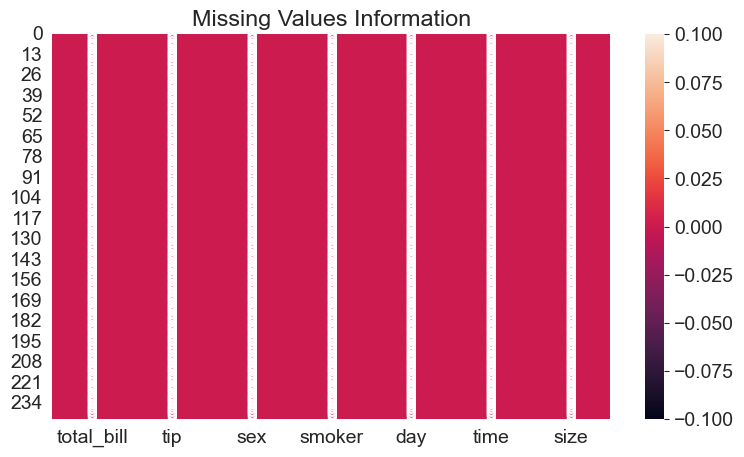

In [15]:
sns.heatmap(df.isna(),annot=True)
plt.title("Missing Values Information")
plt.show()

In [16]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [17]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [18]:
data_con=df[['total_bill','tip']]
data_con.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [19]:
data_cat=df[['sex', 'smoker', 'day', 'time', 'size']]
data_cat.head()

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4


In [20]:
des_con=data_con.describe()
des_con

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [21]:
des_cat=data_cat.describe().T
des_cat

,count,mean,std,min,25%,50%,75%,max
size,244.0,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0


In [22]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


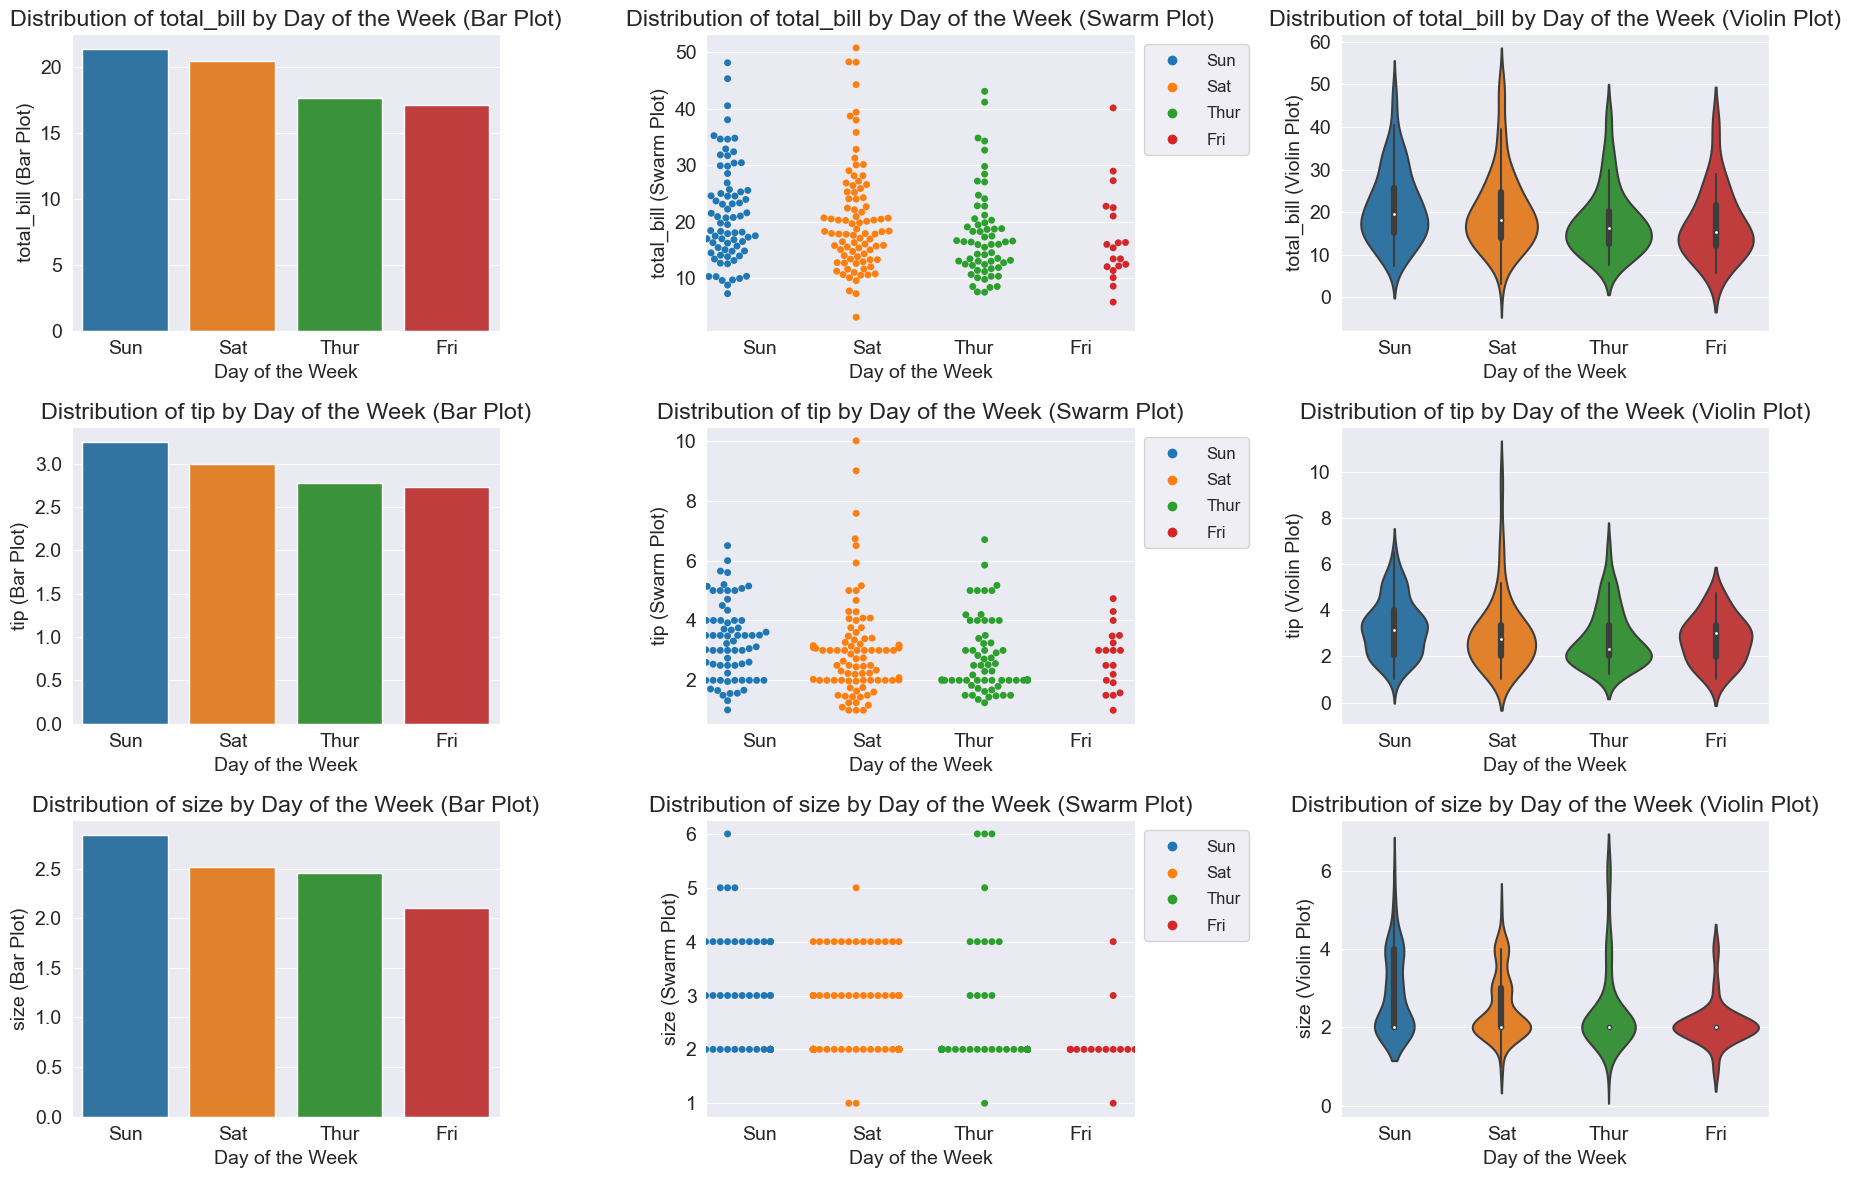

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace with your actual DataFrame)
# df = ...

# List of features to visualize
features = ['total_bill', 'tip', 'size']

# Create subplots with a fixed number of rows and columns
fig, axes = plt.subplots(nrows=len(features), ncols=3, figsize=(18, 12))

# Group by each feature and plot side by side
for i, feature in enumerate(features):
    # Bar plot
    sns.barplot(data=df, x='day', y=feature, ax=axes[i, 0], ci=None)
    axes[i, 0].set_xlabel('Day of the Week')
    axes[i, 0].set_ylabel(f'{feature} (Bar Plot)')
    axes[i, 0].set_title(f'Distribution of {feature} by Day of the Week (Bar Plot)')

    # Swarm plot (replacing bubble plot)
    
    sns.swarmplot(data=df, x='day', y=feature, ax=axes[i, 1], hue='day', dodge=True)
    axes[i, 1].set_xlabel('Day of the Week')
    axes[i, 1].set_ylabel(f'{feature} (Swarm Plot)')
    axes[i, 1].set_title(f'Distribution of {feature} by Day of the Week (Swarm Plot)')



    # Violin plot (unchanged)
    sns.violinplot(data=df, x='day', y=feature, ax=axes[i, 2])
    axes[i, 2].set_xlabel('Day of the Week')
    axes[i, 2].set_ylabel(f'{feature} (Violin Plot)')
    axes[i, 2].set_title(f'Distribution of {feature} by Day of the Week (Violin Plot)')

    # Place the legend outside the swarm plot with a smaller font size
    legend = axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    legend.get_title().set_fontsize('10')  # Set legend title font size
    for item in legend.get_texts():
        item.set_fontsize('12')  # Set legend item font size

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


### Skewness and Kurtosis

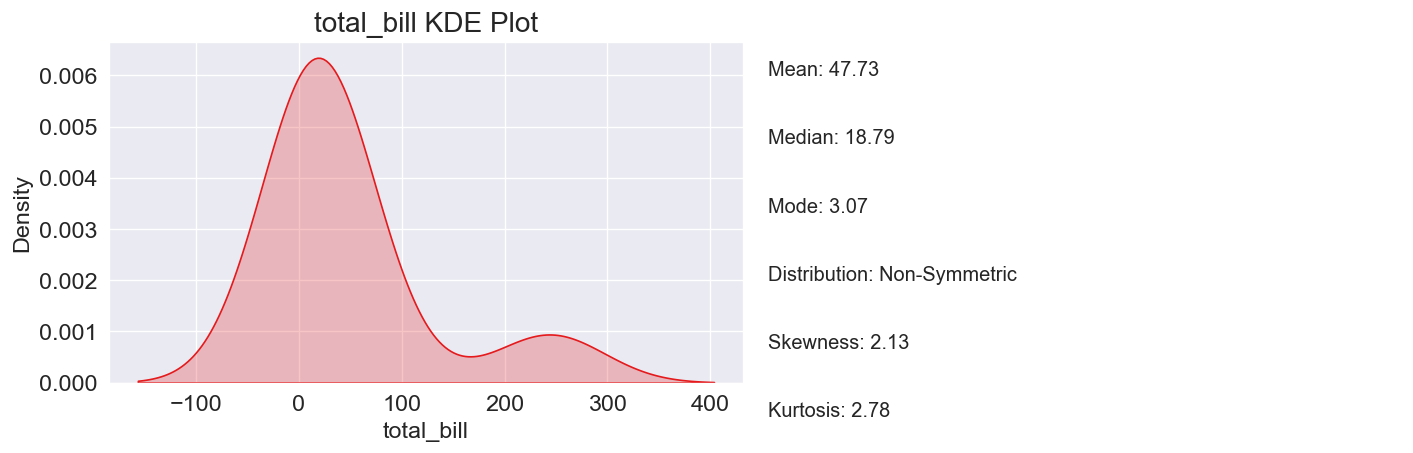

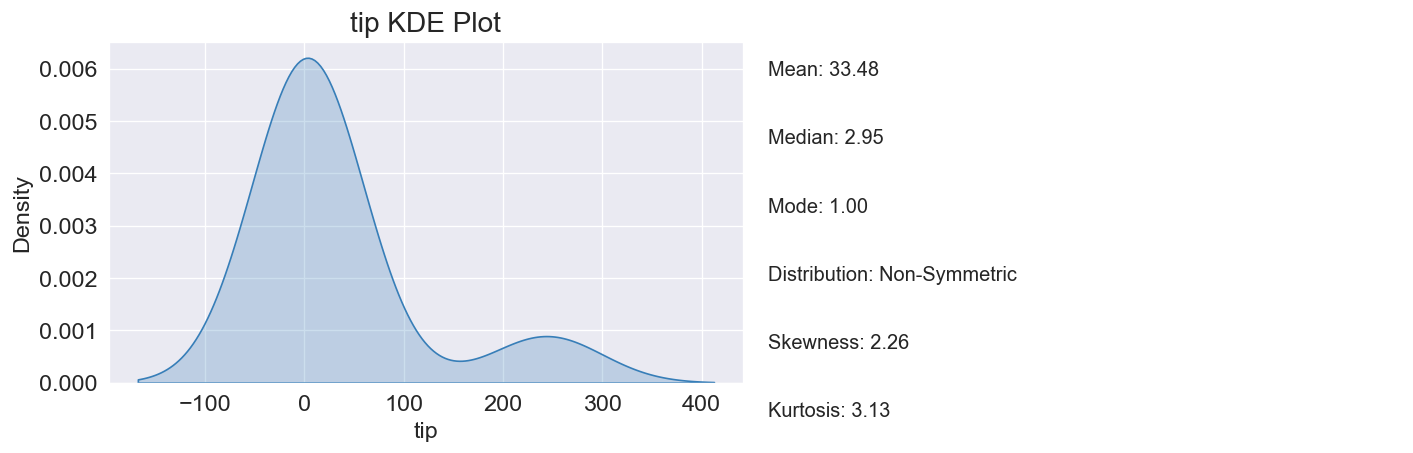

In [24]:
from scipy.stats import skew, kurtosis

# Calculate mean, median, and mode values
mean_values = des_con.mean()
median_values = des_con.median()
mode_values = des_con.mode().iloc[0]

# Define color palette
colors = sns.color_palette("Set1", n_colors=len(des_con.columns))

# Generate KDE plots and display values
for i, column in enumerate(des_con.columns):
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=120)

    # Plot KDE with color
    sns.kdeplot(data=des_con[column], shade=True, ax=ax1, color=colors[i])
    ax1.set_title(f"{column} KDE Plot")

    # Display mean, median, mode values, symmetry, and kurtosis values
    ax2.axis("off")
    ax2.text(0, 0.9, f"Mean: {mean_values[column]:.2f}", fontsize=12)
    ax2.text(0, 0.7, f"Median: {median_values[column]:.2f}", fontsize=12)
    ax2.text(0, 0.5, f"Mode: {mode_values[column]:.2f}", fontsize=12)

    is_symmetric = (mean_values[column] == median_values[column] == mode_values[column])
    symmetry_info = "Symmetric" if is_symmetric else "Non-Symmetric"
    ax2.text(0, 0.3, f"Distribution: {symmetry_info}", fontsize=12)
    
    skewness = skew(des_con[column])
    kurt = kurtosis(des_con[column])
    ax2.text(0, 0.1, f"Skewness: {skewness:.2f}", fontsize=12)
    ax2.text(0, -0.1, f"Kurtosis: {kurt:.2f}", fontsize=12)

    plt.tight_layout()
    plt.show()

### Outliers

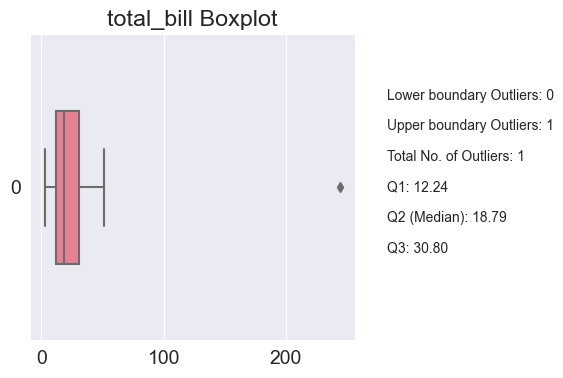

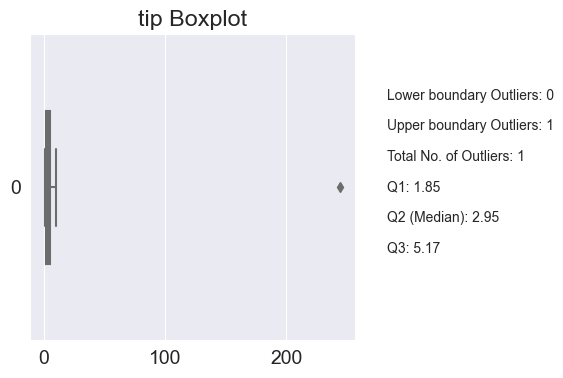

In [25]:
# Calculate Q1, Q2 (median), and Q3 for each feature
Q1 = des_con.quantile(0.25)
Q2 = des_con.quantile(0.5)
Q3 = des_con.quantile(0.75)

# Calculate the Interquartile Range (IQR) for each feature
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create boxplots with separate colors and display outlier counts for each feature
colors = sns.color_palette("husl", n_colors=len(['total_bill', 'tip']))
for column in ['total_bill', 'tip']:
    plt.figure(figsize=(6, 4), dpi=100)
    ax = sns.boxplot(data=des_con[column], color=colors[0], orient='h', width=0.5)
    plt.title(f"{column} Boxplot")

    # Calculate outliers count for the feature
    feature_data = des_con[column]
    lower_outliers_count = len(feature_data[feature_data < lower_bound[column]])
    upper_outliers_count = len(feature_data[feature_data > upper_bound[column]])
    total_outliers_count = lower_outliers_count + upper_outliers_count
    
    plt.text(1.1, 0.5, f"Q1: {Q1[column]:.2f}", ha='left', va='center', transform=ax.transAxes, fontsize=10)
    plt.text(1.1, 0.4, f"Q2 (Median): {Q2[column]:.2f}", ha='left', va='center', transform=ax.transAxes, fontsize=10)
    plt.text(1.1, 0.3, f"Q3: {Q3[column]:.2f}", ha='left', va='center', transform=ax.transAxes, fontsize=10)
    plt.text(1.1, 0.8, f"Lower boundary Outliers: {lower_outliers_count}", ha='left', va='center', transform=ax.transAxes, fontsize=10)
    plt.text(1.1, 0.7, f"Upper boundary Outliers: {upper_outliers_count}", ha='left', va='center', transform=ax.transAxes, fontsize=10)
    plt.text(1.1, 0.6, f"Total No. of Outliers: {total_outliers_count}", ha='left', va='center', transform=ax.transAxes, fontsize=10)

    plt.tight_layout()
    plt.show()


### converting df to csv file as clean_data

In [26]:
df.to_csv("../data/clean_data",index=False)

### Encoding

In [27]:
cat_data=['smoker','sex','day','time']

In [28]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [29]:
for col in cat_data:
    df[col]=le.fit_transform(df[col])
    print(le.classes_)

['No' 'Yes']
['Female' 'Male']
['Fri' 'Sat' 'Sun' 'Thur']
['Dinner' 'Lunch']


In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


### Correlation

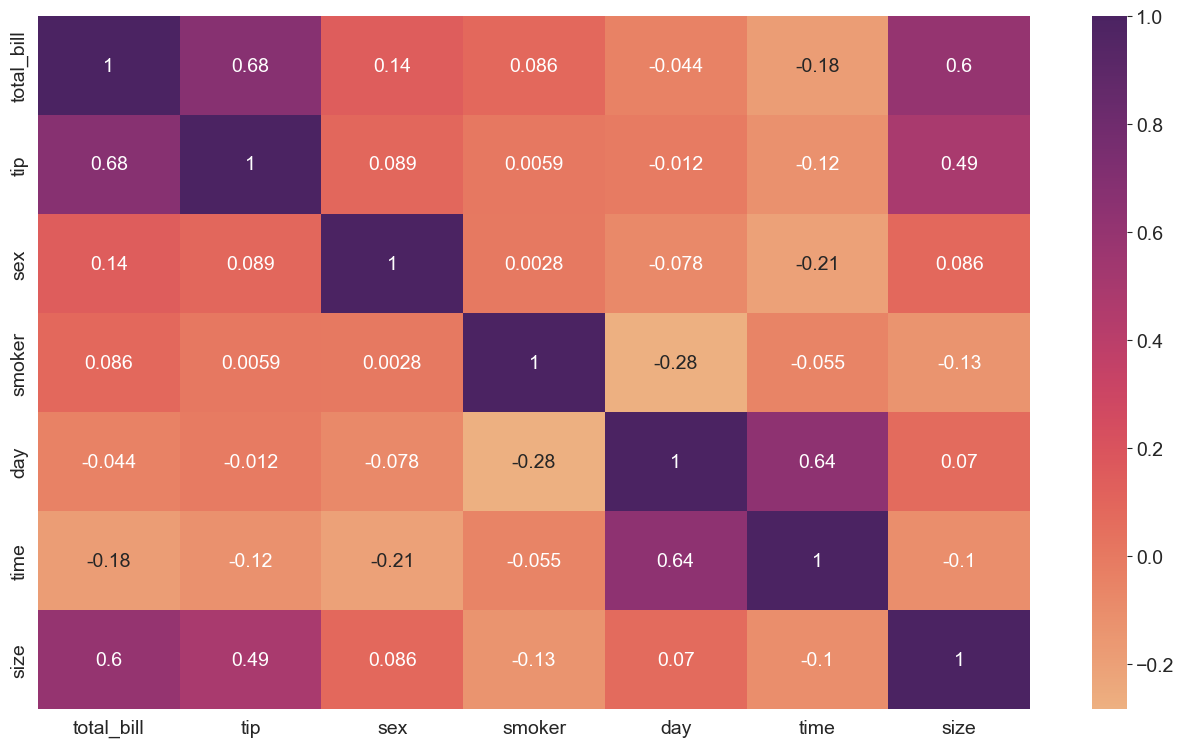

In [31]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot= True,cmap = 'flare')
plt.show()

### Train,test and validation

In [32]:
X = df.drop(['tip'],axis=1)
y = df['tip']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
X_val.to_csv('../data/X_val.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)
y_val.to_csv('../data/y_val.csv', index=False)